In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [3]:
data.shape

(230596, 7)

In [4]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [5]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [6]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


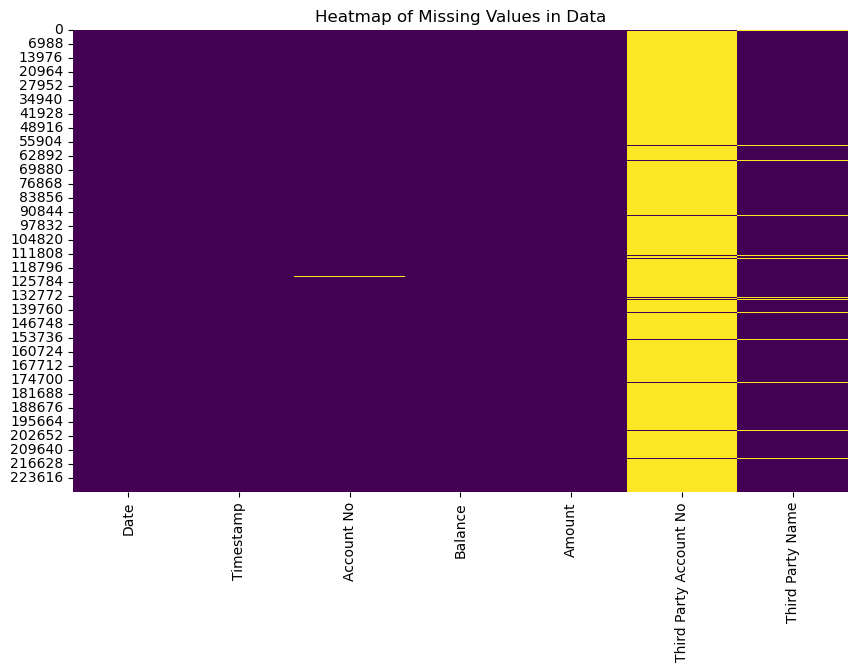

In [7]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Data')
plt.show()

### This map is not giving clear missing values, as we have a large dataset, lets proceed normally

In [8]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [9]:
# Calculate the percentage of null values for each column
data.isnull().mean() * 100

Date                       0.099308
Timestamp                  0.108848
Account No                 0.097140
Balance                    0.106680
Amount                     0.090635
Third Party Account No    97.037243
Third Party Name           3.069871
dtype: float64

### i want to to check the number of transactions of other users, to get more details

In [10]:
# 'Account No' and number of transactions for each account
transactions_per_user = data.groupby('Account No').size()

transactions_count = transactions_per_user.reset_index(name='Number of Transactions')
transactions_count.head()

,Account No,Number of Transactions
0,101531259.0,123
1,104832000.0,164
2,105375973.0,158
3,106601471.0,193
4,108481285.0,368


In [11]:
# finding average number of transactions of all users
#avg_transaction_per_user = 
transactions_per_user.mean()
#avg_transaction_per_user

236.03688524590163

### we have 224 missing values in account number, i think we can create a random account number

In [12]:
# Generating unique account number to remove null values
existing_acc_numbers = pd.to_numeric(data['Account No'], errors='coerce').dropna().unique()
new_acc_number = int(max(existing_acc_numbers) + 1)

# Replace null values in the "Account No" column with the new account number
data['Account No'].fillna(new_acc_number, inplace=True)

# Verifyong that there are no null values in the "Account No" column
verification_result = data['Account No'].isnull().sum()

new_acc_number, verification_result

(999752673, 0)

In [13]:
print(data[(data['Account No'] == 999752673)  ])

              Date Timestamp   Account No       Balance   Amount  \
527     01/01/2023     00:00  999752673.0    813.000000 -1143.00   
1295    01/01/2023     00:00  999752673.0   2284.030000   -18.99   
1335    01/01/2023     00:00  999752673.0   1542.030000   -18.99   
1563    01/01/2023     00:00  999752673.0   3351.010000   -15.99   
1703    01/01/2023     00:00  999752673.0   3785.780000   -18.99   
...            ...       ...          ...           ...      ...   
223332  30/11/2023     23:59  999752673.0  -1043.893200    -7.99   
223657  30/11/2023     23:59  999752673.0  11517.049529   -15.99   
226353  30/11/2023     23:59  999752673.0  -1692.102105   -15.99   
229119  04/12/2023     10:03  999752673.0   2619.340104  -225.37   
230360  06/12/2023     11:34  999752673.0     30.958899  -111.36   

        Third Party Account No Third Party Name  
527                        NaN          Halifax  
1295                       NaN          PureGym  
1335                       NaN   

In [14]:
## float to integer
data['Account No'] = data['Account No'].astype(int)

In [15]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [16]:
# Create a new 'Third Party' column
data['Third Party'] = data['Third Party Name'].combine_first(data['Third Party Account No'])

In [17]:
# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)

In [18]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party
0,01/01/2023,00:00,678330503,2971.000000,1584.00,Westport Care Home
1,01/01/2023,00:00,472213568,3792.000000,1950.00,Barbiee Boutique
2,01/01/2023,00:00,472213568,3012.000000,-780.00,283027736
3,01/01/2023,00:00,283027736,1787.000000,780.00,472213568
4,01/01/2023,00:00,624500124,3226.000000,1825.00,Fat Face
...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972,45935.206861,-41.06,Tesco
230592,06/12/2023,20:55,786141370,-244.837500,-62.35,Sainsbury Local
230593,06/12/2023,21:05,824916823,9709.172159,-32.94,Deliveroo
230594,06/12/2023,21:13,366550080,26834.165794,-19.25,Amazon


In [19]:
data.isnull().sum()

Date           229
Timestamp      251
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [20]:
data['Account No'].nunique() ## total no.of users

977

In [21]:
## find unique and similarities

In [22]:
data.nunique()

Date              340
Timestamp        1401
Account No        977
Balance        229888
Amount          17314
Third Party       756
dtype: int64

1. Date and Timestamp
Method Used: Forward Fill
Why?
Both the Date and Timestamp fields are critical for maintaining the sequence and continuity in time series data.
Forward fill is appropriate here because it assumes that the missing date or timestamp can reasonably be replaced by the last known value, which is a common practice in time-sensitive data to maintain alignment in time series analysis.
This method helps avoid introducing artificial discontinuities in the time sequence, which could occur if we interpolated times or used backward fill.

In [23]:
# Fill missing Date and Timestamp
data['Date'] = data['Date'].fillna(method='ffill')
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

data.isnull().sum()

Date             0
Timestamp        0
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [24]:
# Convert the 'not_happened_yet_date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### i want to impute the missing values in amount and balance column  as well, but I have observed some abnormalities in account transactions

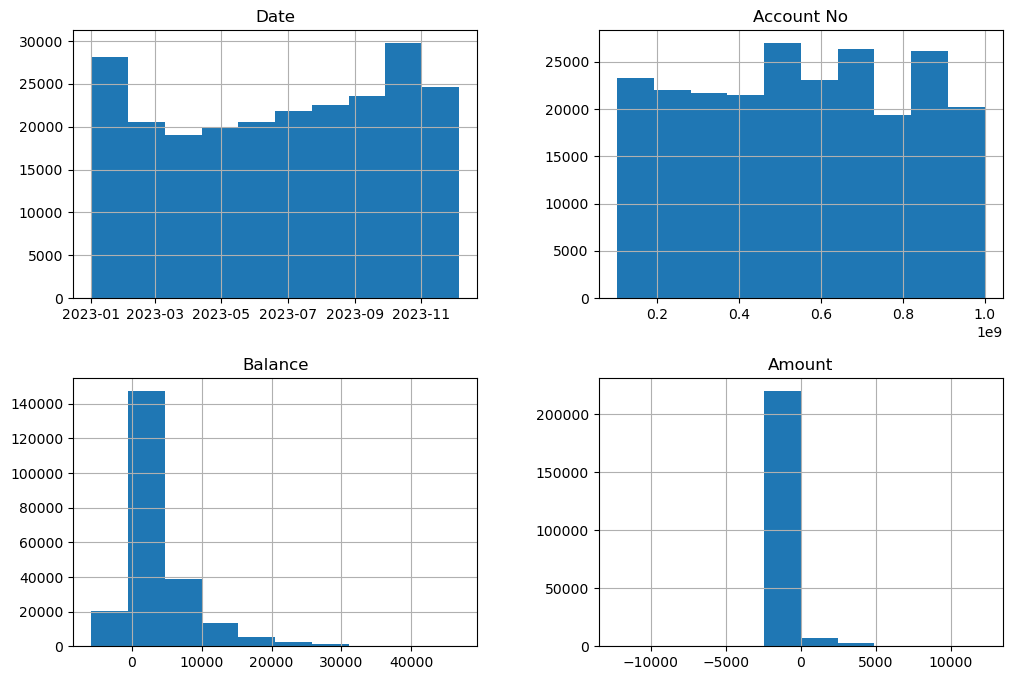

In [25]:
data.hist( figsize = (12,8) )
plt.show() ## to see the distributions of data

In [28]:
data.isnull().sum()

Date             0
Timestamp        0
Account No       0
Balance          0
Amount           0
Third Party    247
dtype: int64

In [ ]:
data

## how to impute amount and balance column 

## analyze the relationship between transaction direction (debit/credit) and balance:
1. Segment the Data
2. Statistical Summary
3. Visual Analysis

In [29]:
# Identify debits and credits
debits = data[data['Amount'] < 0]
credits = data[data['Amount'] > 0]

In [30]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

print("Debit Statistics:\n", debit_stats)
print("\nCredit Statistics:\n", credit_stats)

Debit Statistics:
 count    220163.000000
mean       3614.339767
std        5413.867769
min       -5790.983500
25%         354.042375
50%        1655.592181
75%        5270.905961
max       46184.158837
Name: Balance, dtype: float64

Credit Statistics:
 count    10424.000000
mean      3502.195381
std       4581.763509
min      -4678.910000
25%        868.092676
50%       2134.713712
75%       4359.096632
max      46804.158837
Name: Balance, dtype: float64


In [26]:
# Sort data by Date and Account No
data.sort_values(by=['Account No', 'Date'], inplace=True)

# Forward fill missing Balance and Amount
data['Balance'] = data.groupby('Account No')['Balance'].fillna(method='ffill')
data['Amount'] = data.groupby('Account No')['Amount'].fillna(method='ffill')

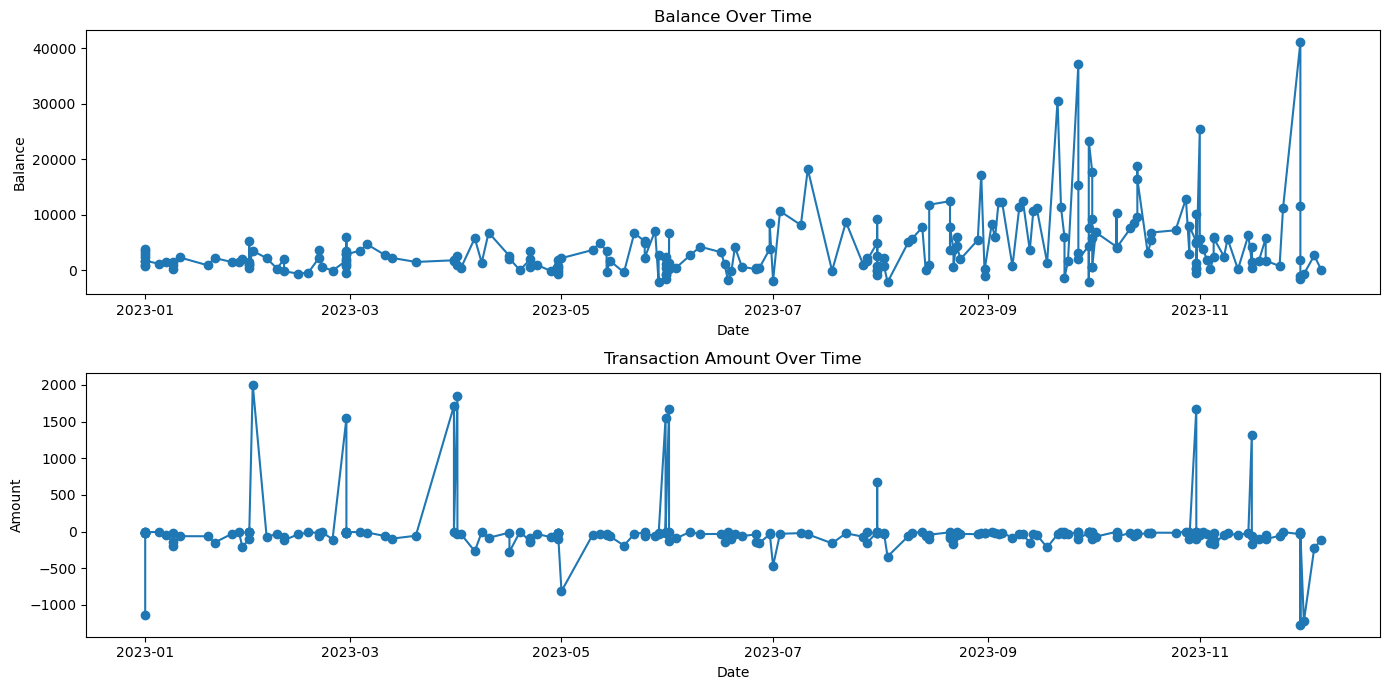

In [27]:
# Optional: Plot to visualize imputation effects
import matplotlib.pyplot as plt

# Filter for a specific account to visualize
sample_account = data[data['Account No'] == 999752673]  # Replace some_account_number with an actual number

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(sample_account['Date'], sample_account['Balance'], marker='o', linestyle='-')
plt.title('Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')

plt.subplot(2, 1, 2)
plt.plot(sample_account['Date'], sample_account['Amount'], marker='o', linestyle='-')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

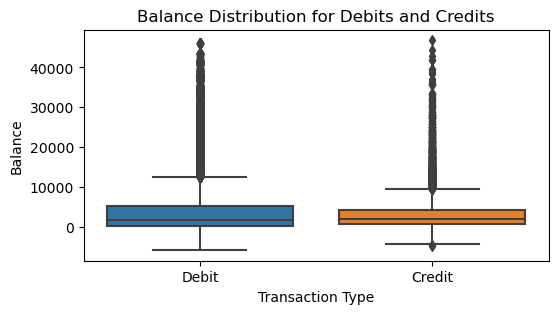

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label the transactions as debit or credit
data['Transaction Type'] = ['Credit' if amt > 0 else 'Debit' for amt in data['Amount']]

# Plotting the distribution of Balances for debits and credits
plt.figure(figsize=(6,3))
sns.boxplot(x='Transaction Type', y='Balance', data=data)
plt.title('Balance Distribution for Debits and Credits')
plt.xlabel('Transaction Type')
plt.ylabel('Balance')
plt.show()

In [ ]:
# Interpolate missing values for Balance and Amount
#data['Balance'] = data['Balance'].interpolate(method='linear')
#data['Amount'] = data['Amount'].interpolate(method='linear')

In [38]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

In [47]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

In [48]:
debit_stats

count    220163.000000
mean       3614.339767
std        5413.867769
min       -5790.983500
25%         354.042375
50%        1655.592181
75%        5270.905961
max       46184.158837
Name: Balance, dtype: float64

In [49]:
credit_stats

count    10424.000000
mean      3502.195381
std       4581.763509
min      -4678.910000
25%        868.092676
50%       2134.713712
75%       4359.096632
max      46804.158837
Name: Balance, dtype: float64

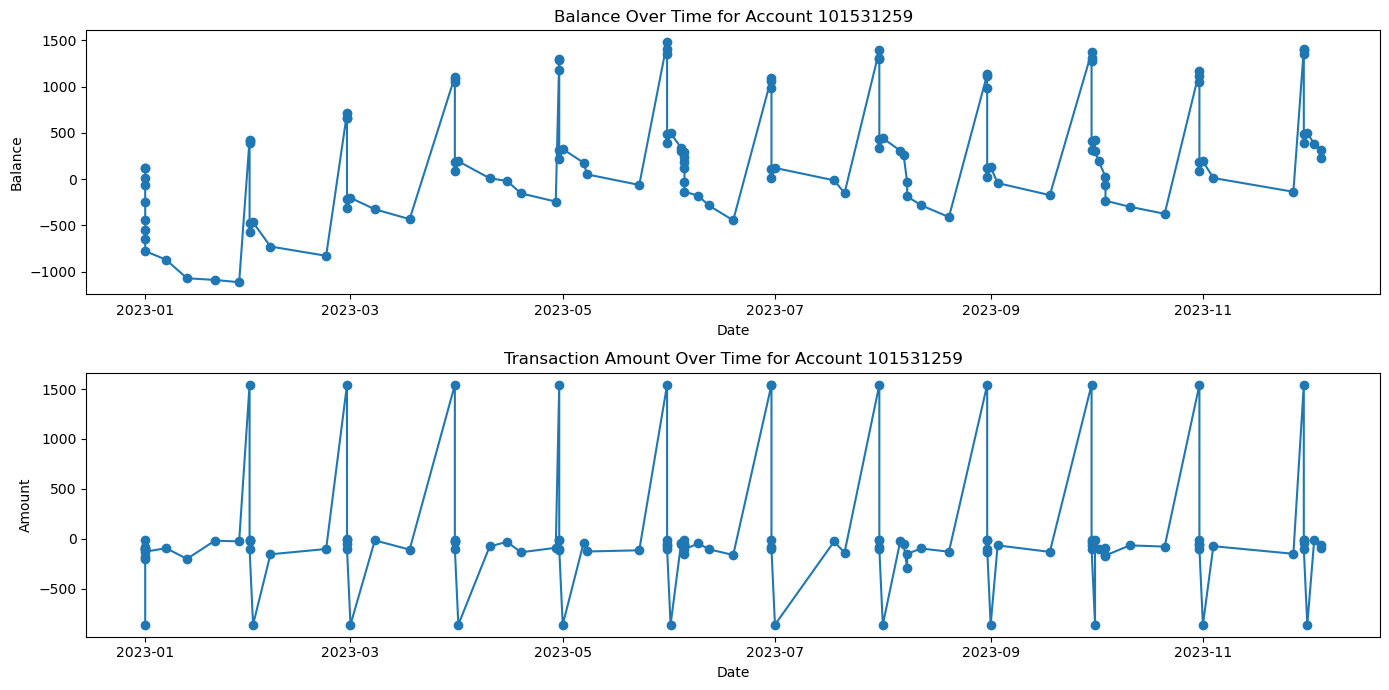

In [65]:
import matplotlib.pyplot as plt

# Specify the account number you are interested in
specific_account_number = 101531259  # Replace with actual account number

# Filter for the specified account to visualize
sample_account = data[data['Account No'] == specific_account_number]

plt.figure(figsize=(14, 7))

# Plot Balance Over Time
plt.subplot(2, 1, 1)
plt.plot(sample_account['Date'], sample_account['Balance'], marker='o', linestyle='-')
plt.title(f'Balance Over Time for Account {specific_account_number}')
plt.xlabel('Date')
plt.ylabel('Balance')

# Plot Transaction Amount Over Time
plt.subplot(2, 1, 2)
plt.plot(sample_account['Date'], sample_account['Amount'], marker='o', linestyle='-')
plt.title(f'Transaction Amount Over Time for Account {specific_account_number}')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


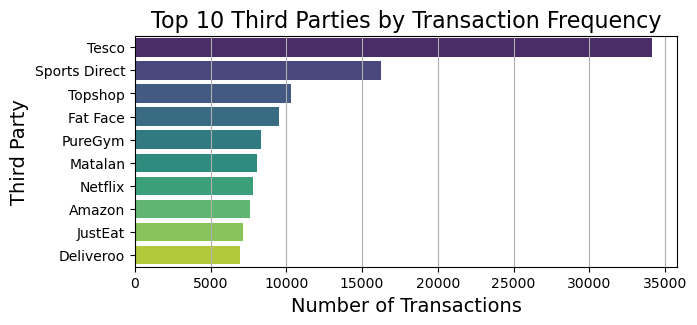

In [54]:
top_parties = data['Third Party'].value_counts().head(10)

plt.figure(figsize=(7,3))
sns.barplot(x=top_parties.values, y=top_parties.index, palette='viridis')
plt.title('Top 10 Third Parties by Transaction Frequency', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Third Party', fontsize=14)
plt.grid(True, axis='x')
plt.show()

In [55]:
# Extract day of the week and hour from the 'Date' and 'Timestamp'
data['Day of Week'] = data['Date'].dt.day_name()
#data['Hour'] = pd.to_datetime(data['Timestamp'], format='%H:%M').dt.hour

# Create a binary feature for transaction direction
data['Transaction Direction'] = np.where(data['Amount'] >= 0, 'Credit', 'Debit')

# Display the updated DataFrame
data[['Date', 'Timestamp', 'Day of Week', 'Transaction Direction']].head()

,Date,Timestamp,Day of Week,Transaction Direction
912,2023-01-01,00:00,Sunday,Debit
4036,2023-01-01,00:00,Sunday,Debit
4037,2023-01-01,00:00,Sunday,Debit
4743,2023-01-01,09:37,Sunday,Debit
5133,2023-01-01,12:00,Sunday,Debit


## Transactions that are several standard deviations away from the mean might be considered suspicious:
- Transactions that are several standard deviations away from the mean might be considered suspicious:

In [ ]:
# Calculate the mean and standard deviation
mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()

# Identify outliers as transactions that are more than 3 standard deviations from the mean
outliers = data[np.abs(data['Amount'] - mean_amount) > 3 * std_amount]

# Display outliers
outliers[['Date', 'Amount', 'Account No', 'Third Party', 'Transaction Direction']]

## transactions occurring repeatedly at the same time to the same third party, which could indicate automated or scripted fraud:
- more than 5 times

In [57]:
# Group by account number, third party, and hour to see repetitive patterns
repetitive_patterns = data.groupby(['Account No', 'Third Party', 'Timestamp']).size().reset_index(name='Count')

# Filter for patterns that occur more than a threshold, e.g., more than 5 times
suspicious_patterns = repetitive_patterns[repetitive_patterns['Count'] > 5]

# Display suspicious repetitive patterns
suspicious_patterns


,Account No,Third Party,Timestamp,Count
6,101531259,Disney,23:59,11
29,101531259,Grand Union BJJ,23:59,11
31,101531259,Hobbycraft,00:00,11
34,101531259,LBG,00:00,12
80,104832000,587923845,23:59,11
...,...,...,...,...
166500,999752672,Halifax,00:00,12
166527,999752672,Netflix,23:59,11
166654,999752673,Blizzard,23:59,6
166732,999752673,Netflix,23:59,7


## Visualisations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', data=outliers)
plt.title('Outlier Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for potential outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', style='Day of Week', data=data)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


In [ ]:
# Create pairplot for selected columns to visualize relationships and distributions
sns.pairplot(data[['Amount', 'Balance', 'Transaction Direction']], hue='Transaction Direction', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Transactions', size=16, y=1.02)
plt.show()

In [ ]:
##

In [ ]:
# Create individual scatter plots instead of a pairplot to avoid issues with KDE and non-numeric data types
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of Amount vs. Balance
sns.scatterplot(x='Amount', y='Balance', hue='Transaction Direction', data=data, ax=axs[0], alpha=0.5)
axs[0].set_title('Scatter Plot of Amount vs. Balance')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Balance')

# Scatter plot of Amount vs. Hour of Transaction
sns.scatterplot(x='Amount', y='Timestamp', hue='Transaction Direction', data=data, ax=axs[1], alpha=0.5)
axs[1].set_title('Scatter Plot of Amount vs. Hour of Transaction')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Hour of Transaction')

plt.tight_layout()
plt.show()

## Monthly Banking Activity: Insights from Total Spent, Total Credited, and Transaction Count

In [ ]:

# Using 'Grouper' to group by month directly

monthly_data = data.groupby(['Account No', pd.Grouper(key='Date', freq='M')]).agg(
    Total_Spent=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x < 0].sum()),
    Total_Credited=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x >= 0].sum()),
    Transaction_Count=pd.NamedAgg(column='Amount', aggfunc='count')
).reset_index()

# Converting 'Date' to 'Year-Month' format for easier reading
monthly_data['Date'] = monthly_data['Date'].dt.to_period('M')

# Display the first few rows of the modified monthly statistics
monthly_data.head(5)


In [ ]:
monthly_data.shape

In [ ]:
data['Account No'].unique().shape

## checking all the users spending evry month or not

In [ ]:
# To ensure each account's activity is accounted for in every expected month of the dataset, 
# we'll check which months each account has transactions and list any missing months.

# First, get the full range of months from the dataset
full_date_range = pd.period_range(data['Date'].min(), data['Date'].max(), freq='M')

# Dictionary to store missing months for each account
missing_months_dict = {}

# Iterating over each account
for account, group in data.groupby('Account No'):
    present_months = group['Date'].dt.to_period('M').unique()
    missing_months = full_date_range[~full_date_range.isin(present_months)]
    if len(missing_months) > 0:
        missing_months_dict[account] = missing_months

# Create a list to store tuples of account number and missing month
missing_months_list = []

# Iterate over the dictionary and append tuples to the list
for account, missing_months in missing_months_dict.items():
    for month in missing_months:
        missing_months_list.append((account, month))

# Create a DataFrame from the list
missing_months_df = pd.DataFrame(missing_months_list, columns=['Account No', 'Missing Month'])

# Display the DataFrame
print(missing_months_df)


In [ ]:
## no.of transactions on each day..smtwthfss..
# find any trends
## his status at the end of month- whether he is in debt or credit

In [ ]:
data

## fraud detection using transactional data

In [ ]:
# Convert 'Date' and 'Timestamp' into a single datetime column for easier manipulation
#data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], errors='coerce')

# Calculate mean and standard deviation for each account without storing them as columns
mean_amounts = data.groupby('Account No')['Amount'].transform('mean')
std_amounts = data.groupby('Account No')['Amount'].transform('std')

# Identify high-value transactions
high_value = data['Amount'] > (mean_amounts + 3 * std_amounts)

# Detect frequent transactions in short times by counting the transactions per minute for each account
frequent_transactions = data.groupby(['Account No', data['Timestamp'].dt.floor('min')])['Amount'].transform('size') > 3

# Check for transactions that are round figures
round_figure_transaction = data['Amount'].mod(1000) == 0

# Combine the criteria to filter potential fraudulent transactions
suspicious_transactions = data[high_value | frequent_transactions | round_figure_transaction]

# Display the suspicious transactions
print(suspicious_transactions[['Date', 'Timestamp', 'Account No', 'Amount', 'Third Party', 'Transaction Direction']])


In [ ]:
suspicious_transactions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# 1. Scatter Plot of Transaction Amounts Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Amount', data=suspicious_transactions, hue='Transaction Direction', style='Transaction Direction')
plt.title('Suspicious Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# 2. Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_transactions['Amount'], bins=30, kde=False, color='red')
plt.title('Distribution of Suspicious Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# Extract more features from 'Timestamp' if needed
suspicious_transactions['Hour of Day'] = suspicious_transactions['Timestamp'].dt.hour
suspicious_transactions['Day of Week'] = suspicious_transactions['Timestamp'].dt.dayofweek

# Select columns to include in the pairplot
# Including 'Amount', 'Hour of Day', and 'Day of Week'
# If 'Transaction Direction' is categorical, it can be used as a hue
plot_data = suspicious_transactions[['Amount', 'Hour of Day', 'Day of Week', 'Transaction Direction']]

# Create the pairplot
sns.pairplot(plot_data, hue='Transaction Direction', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, height=3)
plt.suptitle('Pairplot of Suspicious Transactions')
plt.show()
